In [1]:
import pandas as pd

ddata = pd.read_csv("./data/ddata.txt", encoding="euc-kr", sep="\t", names=["num","speaker","contents","tags"])
mdata = pd.read_csv("./data/mdata.txt", encoding="euc-kr", sep="\t", names=["id","part","category","exptype","exp"])

ddata.head()

,num,speaker,contents,tags
0,0,<CO>,어서오세요. 코디봇입니다. 무엇을 도와드릴까요?,INTRO
1,1,<US>,처음 대학교 들어가는데 입을 옷 코디해주세요.,NaN
2,2,<CO>,신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요.,EXP_RES_SITUATION;EXP_RES_DESCRIPTION
3,3,<AC>,SW-009,NaN
4,4,<US>,이 옷에 어울리는 치마로 추천해주세요.,USER_SUCCESS


# 1. 전체 대화셋 개수 카운트

In [2]:
dial_num = 0

for i in range(1, len(ddata)):
    if ddata.loc[i, "num"] == 0:
        dial_num += 1
print("총 대화셋 수: ",dial_num)

총 대화셋 수:  7235


# 2. Mdata 합치기

## - Id랑 내용만 살리기

In [3]:
mdata.head()

,id,part,category,exptype,exp
0,BL-001,T,BL,F,단추 여밈의 전체 오픈형
1,BL-001,T,BL,F,스탠드 칼라와 브이넥 네크라인의 결합스타일
2,BL-001,T,BL,F,손목까지 내려오는 일자형 소매
3,BL-001,T,BL,F,여유로운 핏
4,BL-001,T,BL,F,어깨에서 허리까지 세로 절개에 풍성한 러플 장식


In [4]:
c_mdata = pd.DataFrame({"id":[0],"exp":[None]})
c_mdata.drop(0, axis=0, inplace=True)
c_mdata

,id,exp


In [5]:
mdata.loc[0,"exp"]+" "+mdata.loc[1,"exp"]

'단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일'

In [6]:
id = ""
idx = 0
for i in range(len(mdata)):
    if id == mdata.loc[i, "id"]:
        c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] = c_mdata.loc[c_mdata.index[(c_mdata["id"] == id)].tolist().pop(),"exp"] + " " + mdata.loc[i, "exp"]
    else:
        id = mdata.loc[i, "id"]
        c_mdata.loc[i, "id"] = id
        c_mdata.loc[i, "exp"] = mdata.loc[i, "exp"]

c_mdata.head()

,id,exp
0,BL-001,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
20,BL-002,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
38,BL-003,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
63,BL-004,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
84,BL-005,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


In [7]:
mdata.iloc[0].id

'BL-001 '

In [8]:
for i in range(len(c_mdata)): # id 뒤에 공백 없애기
    c_mdata.iloc[i].id = c_mdata.iloc[i].id.strip()

print(c_mdata.iloc[0].id)
c_mdata.reset_index(drop=True,inplace=True)
c_mdata.head()

BL-001


,id,exp
0,BL-001,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
1,BL-002,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
2,BL-003,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
3,BL-004,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
4,BL-005,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


## - Part 살려서 합치기

In [9]:
c_mdata2 = pd.DataFrame({"id":[0],'part':[None],"exp":[None]})
c_mdata2.drop(0, axis=0, inplace=True)
c_mdata2

,id,part,exp


In [10]:
id = ""
idx = 0
for i in range(len(mdata)):
    if id == mdata.loc[i, "id"]:
        c_mdata2.loc[c_mdata2.index[(c_mdata2["id"] == id)].tolist().pop(),"exp"] = c_mdata2.loc[c_mdata2.index[(c_mdata2["id"] == id)].tolist().pop(),"exp"] + " " + mdata.loc[i, "exp"]
        if (i + 1 < len(mdata)) and (id != mdata.loc[i+1, "id"]):
            c_mdata2.loc[c_mdata2["id"] == id, "part"] = mdata.loc[mdata["id"] == id, "part"]
    
    else:
        id = mdata.loc[i, "id"]
        c_mdata2.loc[i, "id"] = id
        c_mdata2.loc[i, "exp"] = mdata.loc[i, "exp"]

c_mdata2.head()

,id,part,exp
0,BL-001,T,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
20,BL-002,T,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
38,BL-003,T,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
63,BL-004,T,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
84,BL-005,T,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


In [11]:
c_mdata2.loc[c_mdata2.id == "VT-111 ", "part"] = "O"

In [12]:
for i in range(len(c_mdata2)): # id 뒤에 공백 없애기
    c_mdata2.iloc[i].id = c_mdata2.iloc[i].id.strip()
    c_mdata2.iloc[i].part = c_mdata2.iloc[i].part.strip()

print(c_mdata2.iloc[0].id)
c_mdata2.reset_index(drop=True,inplace=True)
c_mdata2.head()

BL-001


,id,part,exp
0,BL-001,T,단추 여밈의 전체 오픈형 스탠드 칼라와 브이넥 네크라인의 결합스타일 손목까지 내려오...
1,BL-002,T,넓은 셔츠칼라 네크라인 앞중심에 반 오픈 끈여밈있는 스타일 드롭숄더 퍼프형 소매로 ...
2,BL-003,T,앞 중심에 단추 여밈 칼라가 없는 넓고 깊게 파인 브이넥 엉덩이 밑으로 내려오는 긴...
3,BL-004,T,"앞중심에 단추 여밈 칼라가 없는 라운드넥으로 골반 위에서 끝나는 짧은 기장 손목, ..."
4,BL-005,T,앞단추 여밈의 전체 오픈형 칼라가 없는 라운드넥크라인 엉덩이 위에서 끝나는 짧은 기...


In [13]:
c_mdata2.loc[c_mdata2["id"] == "BL-001"].part.values[0]

'T'

# 3. NaN, Null 값 확인

In [14]:
ddata.isnull().sum()

num             0
speaker         0
contents        0
tags        51927
dtype: int64

In [15]:
ddata.isna().sum()

num             0
speaker         0
contents        0
tags        51927
dtype: int64

In [16]:
ddata.fillna("", inplace=True)
ddata.isna().sum()

num         0
speaker     0
contents    0
tags        0
dtype: int64

In [17]:
mdata.isnull().sum()

id          0
part        0
category    0
exptype     0
exp         0
dtype: int64

# 4. 추천 성공 의상 아이디 종류 및 빈도 카운트 

## 한 번에 추천해도 실패하면 전부 실패로 달기

In [18]:
c_data = pd.DataFrame({"contents":[None], "id":["xx-xxx"],"label": [0]})
c_data.drop(0,axis=0,inplace=True)
c_data.head()

,contents,id,label


In [ ]:
dial = ddata.loc[0, "contents"].strip()
print(dial)
ac = ""

for i in range(1,len(ddata)):
    cur_sen = ddata.loc[i,"contents"].strip()

    if ddata.loc[i, "num"] > ddata.loc[i-1, "num"]: # 이전 대화셋에 포함된 문장인지 확인
        if ddata.loc[i,"speaker"] == "<AC>": # case 1. 의상 아이디가 나온 경우
            ac = cur_sen # 의상 아이디 저장
        

        elif "SUCCESS" in ddata.loc[i,"tags"]: # case 2. 의상 추천 성공한 USER_SUCCESS 태그가 나온 경우
            dial = dial + " " + cur_sen
            if len(ac) < 7: # 의상을 하나만 추천한 경우
                try:
                    c_data.loc[i, "contents"] =  dial + " " + ac + " " + c_mdata.loc[c_mdata.id == ac].exp.values[0]
                    c_data.loc[i, "id"] = ac
                    c_data.loc[i, "label"] = 1
                except:
                    pass


            else: # 의상을 한 번에 여러 개 추천한 경우
                idx_cnt = 0
                for one_ac in ac.split():
                    try:
                        c_data.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                        c_data.loc[i + idx_cnt, "id"] = one_ac
                        c_data.loc[i + idx_cnt, "label"] = 1
                        idx_cnt += 1

                    except:
                        pass


        elif "FAIL" in ddata.loc[i,"tags"]: # case 3. 의상 추천 실패한 USER_FAIL 태그가 나온 경우
            dial = dial + " " + cur_sen
            if len(ac) < 7: # 의상을 하나만 추천한 경우
                try:
                    c_data.loc[i, "contents"] =  dial + " " + ac + " " + c_mdata.loc[c_mdata.id == ac].exp.values[0]
                    c_data.loc[i, "id"] = ac
                    c_data.loc[i, "label"] = 0
                except:
                    pass

            else: # 의상을 한 번에 여러 개 추천한 경우
                idx_cnt = 0
                for one_ac in ac.split():
                    c_data.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                    c_data.loc[i + idx_cnt, "id"] = one_ac
                    c_data.loc[i + idx_cnt, "label"] = 0
                    idx_cnt += 1
                
        else: # 그냥 대화문인 경우
            dial = dial + " " + cur_sen
    
    else: #새로운 대화셋 시작이면 초기화
        dial = cur_sen
        ac = ""
        ac_part = ""


In [ ]:
print("전체 데이터 수: ", len(c_data))
c_data.head()

전체 데이터 수:  64598


,contents,id,label
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1.0
7,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0.0
10,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0.0
13,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1.0
18,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1.0


In [ ]:
c_data.reset_index(drop=True ,inplace=True)
c_data.head()

,contents,id,label
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1.0
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0.0
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0.0
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1.0
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1.0


In [ ]:
c_data.loc[0].contents

'어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코디해주세요. 신입생 코디에 어울리게 화사한 스웨터를 추천해드릴게요. 이 옷에 어울리는 치마로 추천해주세요. SW-009 라운드 네크라인 여밈이 없는 풀오버 스타일 전체 케이블 조직 드롭숄더 슬리브 손등까지 오는 길이의 소매 몸에 적당히 맞는 품 엉덩이를 살짝 덮는 길이 네크라인, 소매 끝, 밑단에 고무단 처리 레이온52%,나일론20%,폴리에스터28% 꽈배기 조직, 플레인 조직이 섞여 있는 형태 드라이 크리닝 단색의 라임색 브라이트톤(고명도 고채도)의 옐로우 그린 산뜻하고 발랄한 느낌 기본의 단정한 편안한 산뜻한 발랄한 경쾌한 따뜻한 데일리룩 캠퍼스룩'

In [ ]:
c_data["label"] = c_data["label"].astype(int)
c_data.head()

,contents,id,label
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1


In [ ]:
c_data["label"].value_counts()

1    38899
0    25699
Name: label, dtype: int64

<AxesSubplot:>

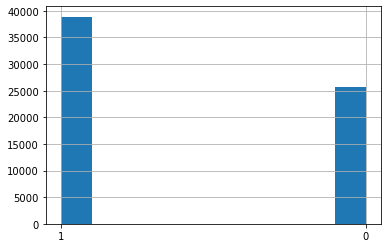

In [ ]:
c_data["label"].astype(str).hist()

In [ ]:
c_data.loc[c_data.id == c_data.iloc[0].id].id.values

array(['SW-009', 'SW-009', 'SW-009', 'SW-009', 'SW-009'], dtype=object)

In [ ]:
count_dic = {}
for i in range(len(c_data)):
    if c_data.iloc[i].label == 1:
        if c_data.iloc[i].id in count_dic.keys():
            count_dic[c_data.iloc[i].id] += 1
        else:
            count_dic[c_data.iloc[i].id] = 1
        

In [ ]:
len(count_dic.keys())

2376

In [ ]:
count_dic["SW-009"]

4

In [ ]:
sorted(count_dic.items(), key=lambda x: x[1],reverse=True)

[('SE-039', 392),
 ('SE-006', 358),
 ('SE-044', 335),
 ('SE-003', 301),
 ('SE-007', 225),
 ('SE-011', 224),
 ('SE-042', 207),
 ('PT-111', 200),
 ('PT-023', 191),
 ('PT-001', 187),
 ('PT-016', 181),
 ('SE-046', 175),
 ('PT-092', 174),
 ('BL-027', 168),
 ('SE-043', 167),
 ('SE-020', 157),
 ('SE-086', 149),
 ('SE-023', 148),
 ('SE-012', 148),
 ('SK-085', 148),
 ('SE-101', 146),
 ('SE-040', 144),
 ('SE-021', 143),
 ('SE-004', 142),
 ('SE-017', 142),
 ('PT-096', 139),
 ('SE-036', 138),
 ('SE-026', 138),
 ('SE-048', 135),
 ('PT-042', 124),
 ('SE-029', 122),
 ('SE-016', 119),
 ('SE-032', 115),
 ('SE-031', 115),
 ('KN-055', 113),
 ('SE-080', 113),
 ('PT-046', 112),
 ('SE-024', 111),
 ('SE-005', 105),
 ('SE-015', 105),
 ('SE-013', 104),
 ('PT-110', 103),
 ('PT-006', 100),
 ('SE-009', 99),
 ('PT-044', 99),
 ('SE-025', 99),
 ('SE-106', 99),
 ('SE-092', 99),
 ('SE-027', 95),
 ('SE-038', 95),
 ('SE-022', 93),
 ('SE-055', 91),
 ('JK-010', 89),
 ('PT-018', 89),
 ('PT-093', 88),
 ('PT-151', 88),
 ('PT

## 한 번에 추천할 때 실패한 옷 골라내기

In [26]:
c_data2 = pd.DataFrame({"contents":[None], "id":["xx-xxx"],"label": [0]})
c_data2.drop(0, axis=0, inplace=True)
c_data2

,contents,id,label


In [27]:
dial = ddata.loc[0, "contents"].strip()
ac = ""

for i in range(1,len(ddata)):
    cur_sen = ddata.loc[i,"contents"].strip()

    if ddata.loc[i, "num"] > ddata.loc[i-1, "num"]: # 이전 대화셋의 문장인지 확인
        if ddata.loc[i,"speaker"] == "<AC>": # 의상 아이디가 나온 경우
            ac = cur_sen
        

        elif "USER_SUCCESS" in ddata.loc[i,"tags"]: # 의상 추천 성공
            if len(ac) < 7: # 의상을 하나만 추천한 경우
                c_data2.loc[i, "contents"] =  dial + " " + ac + " " + c_mdata.loc[c_mdata.id == ac].exp.values[0]
                c_data2.loc[i, "id"] = ac
                c_data2.loc[i, "label"] = 1

            else: # 의상을 한 번에 여러 개 추천한 경우
                idx_cnt = 0
                for one_ac in ac.split():
                    c_data2.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                    c_data2.loc[i + idx_cnt, "id"] = one_ac
                    c_data2.loc[i + idx_cnt, "label"] = 1
                    idx_cnt += 1


        elif "USER_FAIL" in ddata.loc[i,"tags"]: # 의상 추천 실패
            if len(ac) < 7: # 의상을 하나만 추천한 경우
                c_data2.loc[i, "contents"] =  dial + " " + ac + " " + c_mdata.loc[c_mdata.id == ac].exp.values[0]
                c_data2.loc[i, "id"] = ac
                c_data2.loc[i, "label"] = 0

            else: # 의상을 한 번에 여러 개 추천한 경우
                ac_part = ""

                o_word = ['겉옷', '아우터','코트','가디건','조끼','자켓','후드','저지']
                if any(word in cur_sen for word in o_word): # 추천 실패한 의상 찾기
                    ac_part = ac_part + "O"

                t_word = ['상의','스웨터','셔츠','블라우스']
                if any(word in cur_sen for word in t_word):
                    ac_part = ac_part + "T"

                b_word = ['하의','스커트','팬츠','바지','원피스']
                if any(word in cur_sen for word in b_word):
                    ac_part = ac_part + "B"

                s_word = ['신발','구두','힐','샌들','단화','굽']
                if any(word in cur_sen for word in s_word):
                    ac_part = ac_part + "S"

                elif ac_part == "" : # 전부 실패
                    idx_cnt = 0
                    for one_ac in ac.split():
                        c_data2.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                        c_data2.loc[i + idx_cnt, "id"] = one_ac
                        c_data2.loc[i + idx_cnt, "label"] = 0
                        idx_cnt += 1

                idx_cnt = 0
                for one_ac in ac.split(): # 실패한 거 골라서 레이블 달기
                    if c_mdata2.loc[c_mdata2["id"] == one_ac, "part"].values[0] in ac_part:
                        c_data2.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                        c_data2.loc[i + idx_cnt, "id"] = one_ac
                        c_data2.loc[i + idx_cnt, "label"] = 0
                        idx_cnt += 1
                    
                    else:
                        c_data2.loc[i + idx_cnt, "contents"] =  dial + " " + one_ac + " " + c_mdata.loc[c_mdata.id == one_ac].exp.values[0]
                        c_data2.loc[i + idx_cnt, "id"] = one_ac
                        c_data2.loc[i + idx_cnt, "label"] = 1
                        idx_cnt += 1
                
        else:
            dial = dial + " " + cur_sen
    
    else: #새로운 대화셋 시작이면 초기화
        dial = cur_sen
        ac = ""
        ac_part = ""
        idx_cnt = 0


In [28]:
c_data2.head()

,contents,id,label
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1.0
7,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0.0
10,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0.0
13,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1.0
18,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1.0


In [29]:
c_data2.reset_index(drop=True, inplace=True)
c_data2.head()

,contents,id,label
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1.0
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0.0
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0.0
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1.0
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1.0


In [30]:
c_data2["label"] = c_data2["label"].astype(int)
c_data2.head()

,contents,id,label
0,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SW-009,1
1,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-016,0
2,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-052,0
3,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,SK-053,1
4,어서오세요. 코디봇입니다. 무엇을 도와드릴까요? 처음 대학교 들어가는데 입을 옷 코...,CT-019,1


In [31]:
c_data2["label"].value_counts()

1    55283
0     9315
Name: label, dtype: int64

<AxesSubplot:>

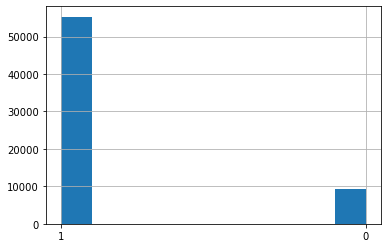

In [32]:
c_data2["label"].astype(str).hist()

# 은전 한 닢 형태소 분석

In [34]:
from koalanlp import API
from koalanlp.types import POS
from koalanlp.proc import *
from koalanlp.Util import initialize, finalize

initialize(java_options="-Xmx4g -Dfile.encoding=utf-8", KKMA="2.0.2", EUNJEON="2.0.2", ETRI="2.0.2")
KDict = Dictionary(API.EUNJEON)

[root] Java gateway started with port number 44837
[root] Callback server will use port number 25334
[koalanlp.jip] JVM initialization procedure is completed.


In [35]:
tagger = Tagger(API.EUNJEON)
tagged = tagger.tag("안녕하세요. 눈이 오는 설날 아침입니다.")
print(tagged)

[안녕하세요 ., 눈이 오는 설날 아침입니다 .]


## Pseudo Code

문장이 의상 아이디라면:
    의상 아이디를 그대로 저장

문장이 유저 성공이라면:
    의상 아이디의 길이가 7 아래면:
        정리 데이터프레임의 의상 태그에 의상 아이디 넣기
        정리 데이터프레임의 내용 태그에 다이얼로그 내용 넣기
        정리 데이터프레임의 라벨 태그에 0 넣기

    의상 아이디의 길이가 7 이상이면:
        idx_num = 1
        for 하나의 아이디 in 의상 아이디.split():
            정리 데이터프레임의 의상 태그에 하나의 아이디 넣기
            정리 데이터프레임의 내용 태그에 다이얼로그 내용 넣기
            정리 데이터프레임의 라벨 태그에 1 넣기
            <여기서 저장하는 인덱스 번호 조심하기> (그냥 append로는 안되나 ㅠ) i + idx_num 자리에 넣어보기

문장이 유저 실패라면
    의상 아이디의 길이가 7 아래면:
        정리 데이터프레임의 의상 태그에 이 옷을 넣기
        정리 데이터프레임의 내용 태그에 다이얼로그 내용 넣기
        정리 데이터프레임의 라벨 태그에 0 넣기

    의상 아이디의 길이가 7 이상이면:
        문장에 상의가 있다면 타입에 O를 저장 [상의와 관련된 키워드: 블라우스, 티, 맨투맨, 티셔츠 등등]도 같이 체크하자
        문장에 하의가 있다면 타입저장변수에 T를 저장
        문장에 아우터가 있다면 타입저장변수에 B를 저장
        문장에 신발이 있다면 타입저장변수에 S를 저장
        for 하나의 아이디 in 의상 아이디.split():
            만약 하나의 아이디가 mdata에서 
            정리 데이터프레임의 의상 태그에 하나의 아이디 넣기
            정리 데이터프레임의 내용 태그에 다이얼로그 내용 넣기
            정리 데이터프레임의 라벨 태그에 1 넣기
            <여기서 저장하는 인덱스 번호 조심하기> (그냥 append로는 안되나 ㅠ) i + idx_num 자리에 넣어보기


아니라면:
    문장을 다이얼로그에 저장